In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

with open('no_rec_no_mask_17-05.pkl', 'rb') as f:
    loaded_dict1 = pickle.load(f)

with open('no_rec_with-mask.pkl', 'rb') as f:
    loaded_dict2 = pickle.load(f)
with open('no_rec_with-mask layer5.pkl', 'rb') as f:
    loaded_dict3 = pickle.load(f)

with open('Rec_no_mask_.pkl', 'rb') as f:
    loaded_dict4 = pickle.load(f)


In [37]:
df4 = pd.DataFrame(loaded_dict4)
df4 = df4[:40]

In [21]:
df2 = pd.DataFrame(loaded_dict2)
df1 = pd.DataFrame(loaded_dict1)
df3 = pd.DataFrame(loaded_dict3)

In [30]:
df2[df3.columns] = df3

In [32]:
df1 = df1[:40]

In [3]:
df = pd.DataFrame(loaded_dict2)


[name for name in df.columns if 'val' in name]
df.columns[df.columns.str.contains('val')]

Index(['1-val-0', '1-val-1', '1-val-2', '2-val-0', '2-val-1', '2-val-2',
       '3-val-0', '3-val-1', '3-val-2', '4-val-0', '4-val-1', '4-val-2'],
      dtype='object')

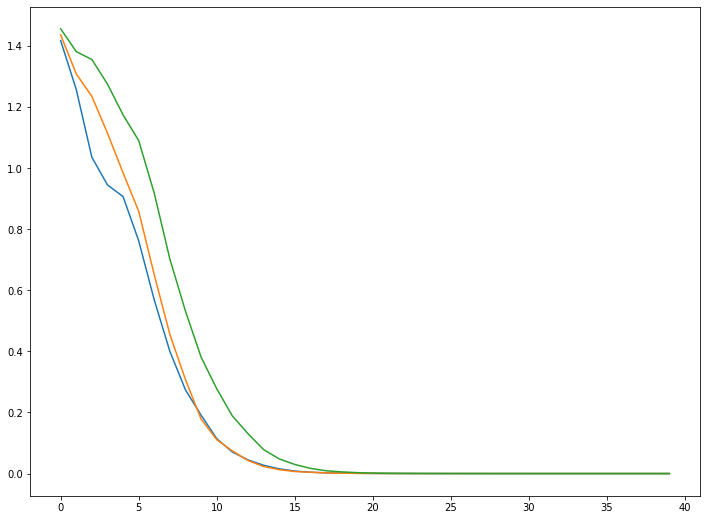

In [42]:
plt.plot(df[[name for name in df.columns if 'los' in name]])

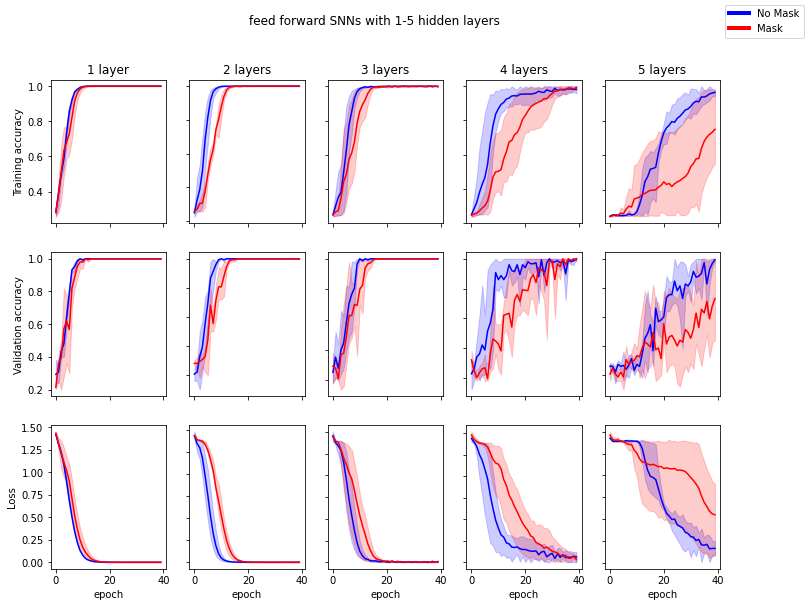

In [34]:
fig, axs = plt.subplots(3, 5)
plt.rcParams["figure.figsize"] = (12,9)
colors = ['blue','blue','blue','blue','blue']
fig.suptitle('feed forward SNNs with 1-5 hidden layers')
for j,layers in enumerate(range(1,6)):
    color = colors[j]
    for i,metric in enumerate(['train','val','loss']):
        columns = [f'{layers}-{metric}-{k}' for k in range(3)]
        axs[i,j].fill_between(df1[columns].index,df1[columns].min(axis=1),df1[columns].max(axis=1),color=color,alpha=.2)
        axs[i,j].plot(df1[columns].mean(axis=1),color=color)
        #axs[j,i].set_title(metric)
        axs[i,j].set(xlabel='epoch', ylabel=f'{layers} layers',label=f'{layers} layers')


        axs[i,j].fill_between(df2[columns].index,df2[columns].min(axis=1),df2[columns].max(axis=1),color='red',alpha=.2)
        axs[i,j].plot(df2[columns].mean(axis=1),color='red')
        #axs[j,i].set_title(metric)
        axs[i,j].set(xlabel='epoch', ylabel=f'{layers} layers',label=f'{layers} layers')

for il,l in enumerate(range(1,6)):
    layer_string = f'{l} layer' if l == 1 else f'{l} layers'
    axs[0,il].set_title(layer_string)
axs[0,0].set(ylabel='Training accuracy')
axs[1,0].set(ylabel='Validation accuracy')
axs[2,0].set(ylabel='Loss')
for ax in axs.flat:
    ax.label_outer()
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]



fig.legend(custom_lines, ['No Mask', 'Mask'])

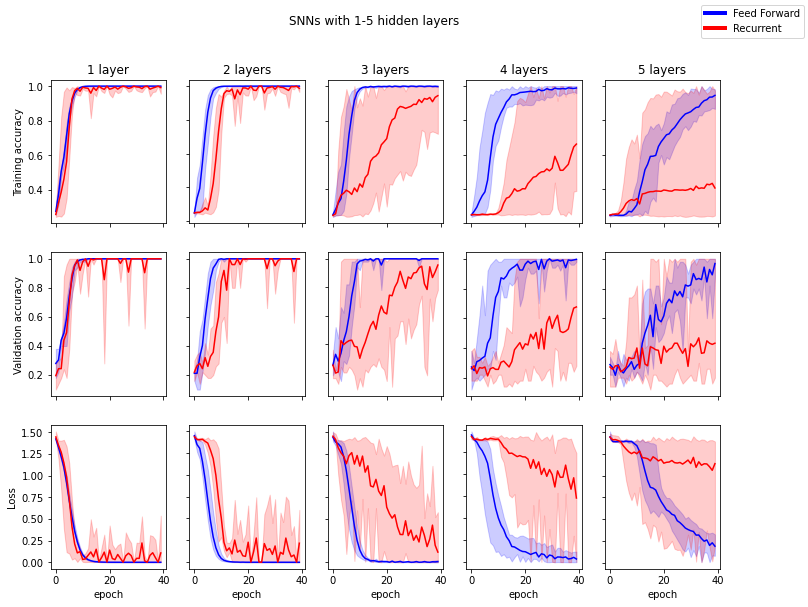

In [41]:
fig, axs = plt.subplots(3, 5)
plt.rcParams["figure.figsize"] = (12,9)
colors = ['blue','blue','blue','blue','blue']
fig.suptitle('SNNs with 1-5 hidden layers')
for j,layers in enumerate(range(1,6)):
    color = colors[j]
    for i,metric in enumerate(['train','val','loss']):
        columns = [f'{layers}-{metric}-{k}' for k in range(5)]
        axs[i,j].fill_between(df1[columns].index,df1[columns].min(axis=1),df1[columns].max(axis=1),color=color,alpha=.2)
        axs[i,j].plot(df1[columns].mean(axis=1),color=color)
        #axs[j,i].set_title(metric)
        axs[i,j].set(xlabel='epoch', ylabel=f'{layers} layers',label=f'{layers} layers')


        axs[i,j].fill_between(df4[columns].index,df4[columns].min(axis=1),df4[columns].max(axis=1),color='red',alpha=.2)
        axs[i,j].plot(df4[columns].mean(axis=1),color='red')
        #axs[j,i].set_title(metric)
        axs[i,j].set(xlabel='epoch', ylabel=f'{layers} layers',label=f'{layers} layers')

for il,l in enumerate(range(1,6)):
    layer_string = f'{l} layer' if l == 1 else f'{l} layers'
    axs[0,il].set_title(layer_string)
axs[0,0].set(ylabel='Training accuracy')
axs[1,0].set(ylabel='Validation accuracy')
axs[2,0].set(ylabel='Loss')
for ax in axs.flat:
    ax.label_outer()
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]



fig.legend(custom_lines, ['Feed Forward', 'Recurrent'])

In [39]:
    df4

,1-loss-0,1-train-0,1-val-0,1-loss-1,1-train-1,1-val-1,1-loss-2,1-train-2,1-val-2,1-loss-3,...,5-val-1,5-loss-2,5-train-2,5-val-2,5-loss-3,5-train-3,5-val-3,5-loss-4,5-train-4,5-val-4
0,1.510957,0.243125,0.14,1.426631,0.252813,0.26,1.437111,0.253437,0.20,1.421516,...,0.28,1.413091,0.251875,0.24,1.481812,0.246875,0.14,1.425922,0.249375,0.38
1,1.193311,0.542813,0.22,1.398649,0.254687,0.14,1.395411,0.249062,0.30,1.404434,...,0.26,1.419302,0.253750,0.26,1.465072,0.254687,0.26,1.398649,0.252500,0.14
2,0.837813,0.822500,0.32,1.404629,0.259687,0.18,1.396996,0.244687,0.30,1.390760,...,0.30,1.389134,0.251250,0.28,1.461847,0.253125,0.46,1.437187,0.258125,0.14
3,0.381628,0.967500,0.88,1.353951,0.289688,0.28,1.379022,0.282188,0.30,1.413872,...,0.28,1.387009,0.252812,0.20,1.454924,0.276562,0.34,1.403804,0.246250,0.34
4,0.116910,0.992188,0.96,1.244418,0.379687,0.34,1.323641,0.354687,0.26,1.339522,...,0.20,1.386289,0.251562,0.30,1.361164,0.331875,0.26,1.398445,0.260937,0.22
5,0.100235,0.975625,1.00,0.848028,0.760937,0.74,1.099341,0.587500,0.56,1.142820,...,0.20,1.386658,0.252500,0.26,1.146566,0.439062,0.28,1.400243,0.249375,0.24
6,0.031243,0.994375,1.00,0.419307,0.954062,0.98,0.716388,0.835937,0.76,0.716348,...,0.28,1.386289,0.251563,0.18,0.940391,0.578750,0.30,1.388451,0.247812,0.44
7,0.046497,0.987813,1.00,0.154252,0.988750,1.00,0.350662,0.960625,0.84,0.342030,...,0.22,1.406291,0.251562,0.24,0.803268,0.645938,0.74,1.388214,0.254375,0.22
8,0.003867,1.000000,1.00,0.049308,0.997813,1.00,0.117786,0.994375,0.96,0.116018,...,0.24,1.386290,0.251563,0.24,0.717983,0.690313,0.74,1.386294,0.251562,0.24
9,0.153569,0.975937,1.00,0.045173,0.991250,1.00,0.157616,0.962500,0.84,0.102149,...,0.20,1.387159,0.251562,0.24,0.805568,0.665937,0.76,1.387645,0.252500,0.22


In [1]:
import pickle


with open('xor-experiments/mod0to1-5layers-3reps/lossdictmod.p', 'rb') as f:
    loaded_dict1 = pickle.load(f)

with open('xor-experiments/mod0to1-5layers-3reps/traindictmod.p', 'rb') as f:
    loaded_dict2 = pickle.load(f)
with open('xor-experiments/mod0to1-5layers-3reps/testdictmod.p', 'rb') as f:
    loaded_dict3 = pickle.load(f)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
train = pd.DataFrame(loaded_dict2)
loss = pd.DataFrame(loaded_dict1)
test = pd.DataFrame(loaded_dict3)

In [10]:
[name for name in train.columns if '0.0' in name]

['0.0_layers_rep_0', '0.0_layers_rep_1', '0.0_layers_rep_2']

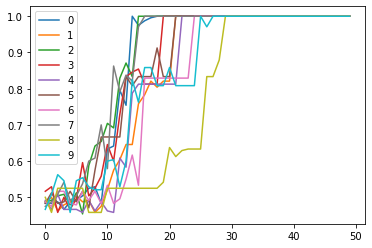

In [27]:
for i in range(10):
    plt.plot(test[[name for name in test.columns if f'0.{i}' in name]].mean(axis=1),label=i)
plt.legend()